In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
import itertools as it
from functions import isingmodel_rev,isingmodel_rev_frac2,construct_ham,construct_distant_ham_2sites
import itertools as it
import qutip as q
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [3]:
def func1(phi,l,lamb,gamma):
    
    part1=(lamb-np.cos(phi))/np.sqrt((lamb-np.cos(phi))**2+(gamma*np.sin(phi))**2)
    
    return part1*np.cos(l*phi)/np.pi

def func2(phi,l,lamb,gamma):
    
    part2=(gamma*(np.sin(phi)))/np.sqrt((lamb-np.cos(phi))**2+(gamma*np.sin(phi))**2)
    
    return -part2*np.sin(l*phi)/np.pi

def gfunc(l,lamb,gamma=1):
    
    integ1=integrate.quad(func1,0,np.pi,args=(l,lamb,gamma))
    integ2=integrate.quad(func2,0,np.pi,args=(l,lamb,gamma))
    
    return integ1[0]-integ2[0]

def assign_g(a,b,lamb,gamma):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return 1j*gfunc((d-1)//2,lamb,gamma)
        elif a%2==0:
            
            return -1j*gfunc(-((d+1)//2),lamb,gamma)
    else:
        return 0
    
def get_mat(lam,gam):
    
        
    mat = [[None for c in range(1,2*L+1)] for r in range(1,2*L+1)]
    for x in range(1,2*L+1):
        for y in range(1,2*L+1):
            mat[x-1][y-1]=assign_g(x,y,lam,gam)  
            
    return np.array(mat)

In [4]:
L=2
def maxerg(lambdas,gammas):
    
    max_erg_vec=np.zeros((len(lambdas),len(gammas)))
    
    for b,gs in enumerate(gammas):

        for a, lam in enumerate(lambdas):
            
            matr=get_mat(lam,gs)

            autov=np.array(eigvalsh(matr))

            nus=autov[L:]

            eigrho=np.zeros(2**L)

            for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
                signarr=np.array(sign)
                rowsign=np.array([(1+signarr[n]*nus[n])/2 for n in range(L)])

                eigrho[j]=np.prod(rowsign)

            eigval=np.sort(eigrho)

            reduced_H_matr=construct_ham(L,lam)

            h_eigval = reduced_H_matr.eigenenergies()

            sortdesc=np.sort(eigval)[::-1]

            max_ergo=0

            for n in range(2**L):
                max_ergo+=(eigval[n]-sortdesc[n])*h_eigval[n]

            max_ergo=(max_ergo)/(2*abs(h_eigval[0]))
            
            max_erg_vec[b,a]=(max_ergo)
            
    return max_erg_vec


In [5]:
L=2
def firsdevmaxerg(lambdas,gammas):
    
    max_erg_vec=np.zeros((len(lambdas),len(gammas)))
    
    for b,gs in enumerate(gammas):

        for a, lam in enumerate(lambdas):
            
            matr=get_mat(lam,gs)

            autov=np.array(eigvalsh(matr))

            nus=autov[L:]

            eigrho=np.zeros(2**L)

            for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
                signarr=np.array(sign)
                rowsign=np.array([(1+signarr[n]*nus[n])/2 for n in range(L)])

                eigrho[j]=np.prod(rowsign)

            eigval=np.sort(eigrho)

            reduced_H_matr=construct_ham(L,lam)

            h_eigval = reduced_H_matr.eigenenergies()

            sortdesc=np.sort(eigval)[::-1]

            max_ergo=0

            for n in range(2**L):
                max_ergo+=(eigval[n]-sortdesc[n])*h_eigval[n]

            max_ergo=(max_ergo)/(2*abs(h_eigval[0]))
            
            max_erg_vec[b,a]=(max_ergo)
            
        max_erg_vec[b,:]=np.gradient(max_erg_vec[b,:])
            
    return max_erg_vec


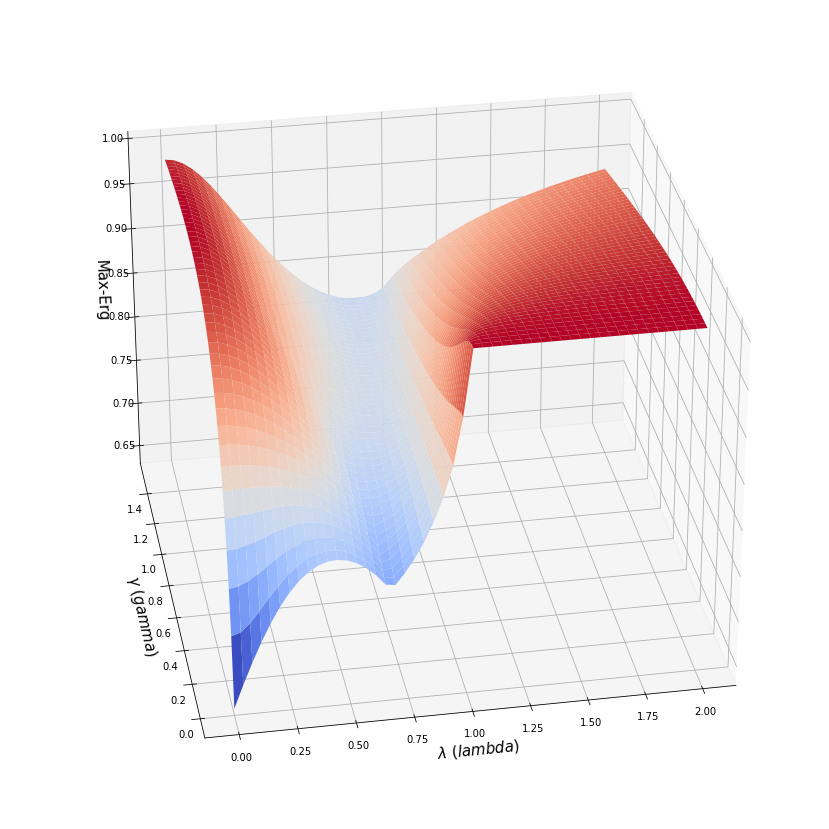

In [6]:
lambdarange=np.linspace(0,2)
gammarange=np.linspace(0,1.5)
Xx, Yy = np.meshgrid(lambdarange,gammarange)

Z=maxerg(lambdarange,gammarange)

fig = plt.figure(figsize=[15,15])
ax = fig.gca(projection='3d')

surf = ax.plot_surface(Xx, Yy, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.view_init(elev=30., azim=260)
ax.set_xlabel(r"$\lambda  \ (lambda)$",fontsize=15)
ax.set_ylabel(r"$\gamma \ (gamma) $",fontsize=15)
ax.set_zlabel(r"Max-Erg",fontsize=15)

plt.savefig("3dplotmaxerg")
plt.show()

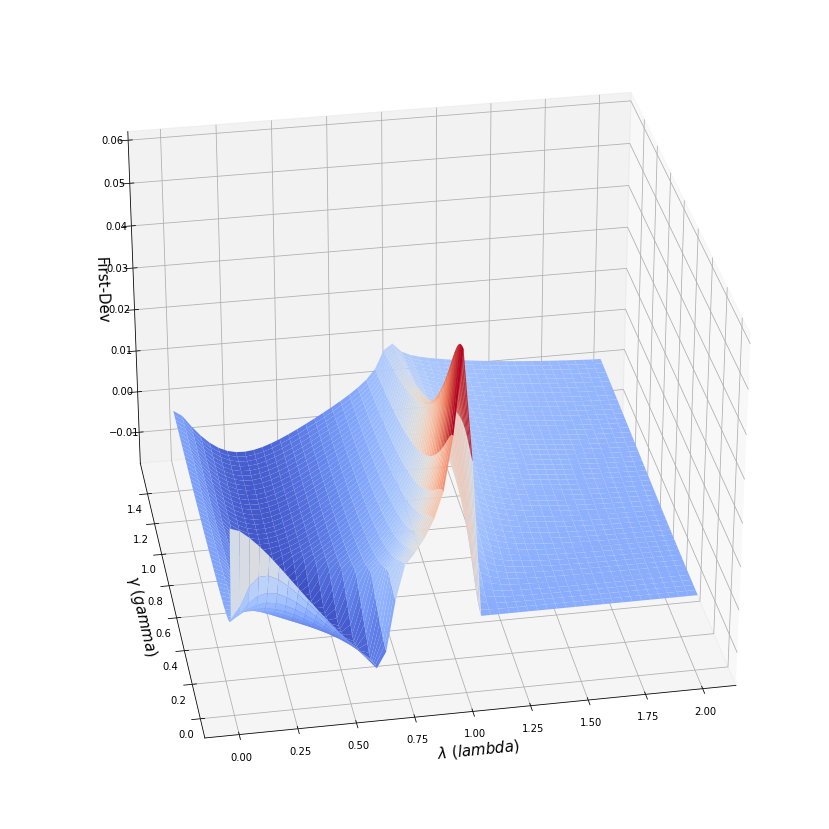

In [7]:
lambdarange=np.linspace(0,2)
gammarange=np.linspace(0,1.5)
Xx, Yy = np.meshgrid(lambdarange,gammarange)

Z=firsdevmaxerg(lambdarange,gammarange)

fig = plt.figure(figsize=[15,15])
ax = fig.gca(projection='3d')

surf = ax.plot_surface(Xx, Yy, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.view_init(elev=30., azim=260)
ax.set_xlabel(r"$\lambda  \ (lambda)$",fontsize=15)
ax.set_ylabel(r"$\gamma \ (gamma) $",fontsize=15)
ax.set_zlabel(r"First-Dev",fontsize=15)

plt.savefig("3dplotfirstdevmaxerg")
plt.show()

[[ 2.53750230e-02  2.46111431e-02  2.28599512e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.49718199e-03  6.33703463e-03  1.06993133e-02 ...  1.94769941e-06
   1.79343639e-06  1.72088565e-06]
 [ 1.64896663e-03  3.11821436e-03  5.60569328e-03 ...  7.78115042e-06
   7.16537485e-06  6.87575331e-06]
 ...
 [-1.51961577e-03 -2.99057133e-03 -5.79409167e-03 ...  2.15577279e-03
   2.04892628e-03  1.99720129e-03]
 [-1.51040134e-03 -2.97249949e-03 -5.75932082e-03 ...  2.19743856e-03
   2.09024586e-03  2.03831311e-03]
 [-1.50126519e-03 -2.95457861e-03 -5.72483039e-03 ...  2.23777078e-03
   2.13034373e-03  2.07825744e-03]]


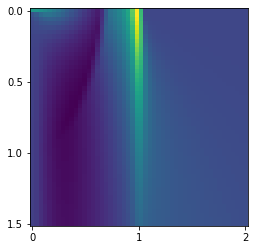

In [7]:
ax = plt.subplot()
im = ax.imshow(Z)
print(Z)
xticks=np.array([0,1,2])
yticks=np.array([0,0.5,1,1.5])
ax.set_xticks(np.linspace(0,49,len(xticks)))
ax.set_yticks(np.linspace(0,49,len(yticks)))
#non è che x è y? c'è uno bello stacco a metà dellle y
ax.set_xticklabels(xticks)
ax.set_yticklabels(yticks)
plt.show()

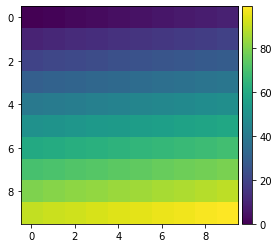

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = plt.subplot(111)
im = ax.imshow(np.arange(100).reshape((10, 10)))

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

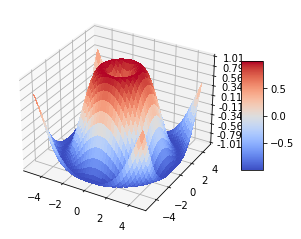

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
